# 6 Integrais e médias usando métodos de Monte Carlo

## 1. Considere o seguinte integral:

$$ I = \int_{0}^{10} \frac{4x}{(x² + 1)³} dx $$

__a.__ Utilize números aleatórios para determinar o seu valor, com $N = {10}^{5}$

In [28]:
from random import random
import matplotlib.pyplot as plt
import numpy as np

N=pow(10, 5)
b = 10.0 # x_max
a = 0.0 # x_min
x_lista = [] # lista de aleatórios
fx_lista = []
fx2_lista = [] #f(x)²

def f(x):
    return (4*x)/pow((x**2+1),3)

def Integracao(fx_lista): # método de integração
    return ((b-a)/N)*sum(fx_lista)

for i in range(N):
    x_random = b*random()
    fx = f(x_random) # f(x)
    fx2 = fx**2 # f(x)²
    x_lista.append(x_random)
    fx_lista.append(fx)
    fx2_lista.append(fx2)
    
I1 = Integracao(fx_lista)
    
#plt.scatter(x_lista, y_lista)
print('integral calculada:', I1, '\nValor Real: 0.9999')

integral calculada: 1.0109876928692054 
Valor Real: 0.9999


__b.__ Considerando que $<g(x)>= \frac{b − a}{N} \sum_{i} f (ξ_{i})$ ,
Em que, $f (x) = \frac{4x}{(x² + 1)³} $ Calcule a variância e o desvio-padrão de $g(x) = (b − a)f (x)$, e o respectivo erro-padrão, que corresponde ao erro estatístico da estimativa do integral.

In [30]:
N=pow(10, 5)
def var_g(): # variância
    return ( (1/N)*((b-a)**2)*sum(fx2_lista) ) - ( (1/N)*(b-a)*sum(fx_lista) )**2
def std_g(): # desvio padrão
    return np.sqrt(var_g())
def err_g(): # erro-padrão
    return std_g()/np.sqrt(N)

print('var:', var_g())
print('std:', std_g())
print('err:', err_g())

var: 5.979426534792579
std: 2.4452865956350758
err: 0.007732675174085988


__c.__ Compare o resultado que obteve com o valor determinado analiticamente.

0.9946934161604655


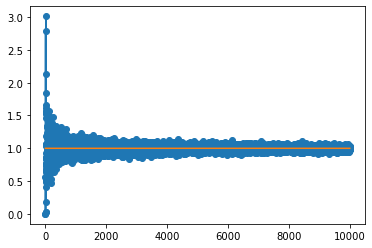

In [39]:
x2 =[0]
y2 =[0]
res =[0.9999]
n = pow(10, 4)
for N in range (1, n, 1) :
    x =0.00000000
    a =0.9999
    total =0.00000
    for i in range ( N ) :
        r =b* random()
        x = x + f(r)
    #os.system ( 'clear')
    float ( total )
    total = (b/ N ) * x
    x2.append ( N )
    y2.append ( total )
    res.append ( a )
print ( total )
plt.plot ( x2 , y2 , '-o')
plt.plot ( x2 , res )
# plt.show ()
# Script para o cálculo de <g(x)> para N 5000

## __2.__ ---------------------------------------------------------------------------------------------

Imagine que as partículas que atingem um determinado volume depositam nele energia de acordo com a expressão:

$$ ∆E = \frac{1}{1 + E(1 − cosθ)}$$

em que $E$ é a energia incidente da partícula, que obedece a uma distribuição exponencial do tipo $P (E) = λe^{−λE}$, com $0≤ E<∞$, e em que $λ = 0.511M eV^{−1}$; e $θ$ o ângulo de difusão, que vamos assumir como uma distribuição de probabilidades contínua de $[−π/2, π/2]$. Vamos também asumir que as duas variáveis são independentes.

__a.__ Escreva um código para a amostragem da energia e do ângulo de incidência que atingem o volume.

In [26]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

a = 0 # E_min
b = 50 # inf E_max

lbd = 0.511
N = pow(10, 5)
lst_Erg = []
lst_theta = []
lst_F = []
lst_F2 = [] # f²

def f(P, theta):
    return 1/(1+P*(1 - np.cos(theta)))

for i in range(N):
    theta_r = np.pi*random() - np.pi/2
    lst_theta.append(theta_r)
    
    E_r = b*random()
    P = lbd*np.exp(-lbd*E_r)
    
    lst_Erg.append(P)
    F = f(P, theta_r)
    lst_F.append(F)
    F2 = F**2
    lst_F2.append(F2)

array([[<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'angle'}>]], dtype=object)

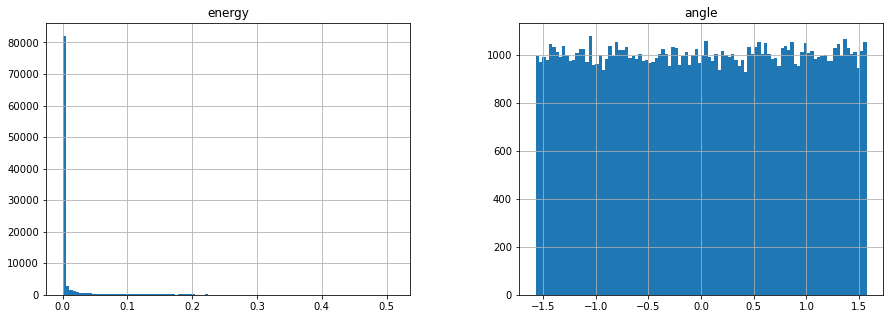

In [40]:
import pandas as pd
df = pd.DataFrame({"energy": lst_Erg, "angle": lst_theta})
df.hist(figsize=(15, 5), bins=100)

<AxesSubplot:xlabel='energy', ylabel='angle'>

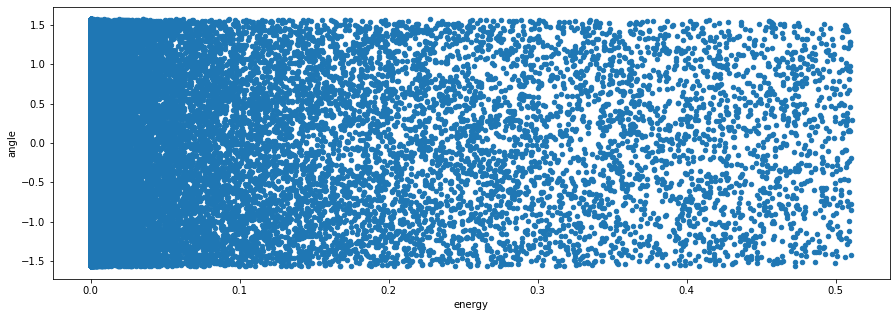

In [46]:
df.plot.scatter(x='energy', y='angle', figsize=(15, 5))

__b.__ Calcule o valor médio da energia depositada $<∆E>$ ao fim de $N=10^{5}$ partículas, assim como a sua variância e desvio-padrão. Calcule depois o erro-padrão do valor médio.

In [28]:
F_medio = sum(lst_F)/N
print('<f(x)>', F_medio)
G_medio = (b-a)*F_medio
print('<g(x)>', G_medio)

def var_g(): # variância
    return ( (1/N)*((b-a)**2)*sum(lst_F2) ) - ( (1/N)*(b-a)*sum(lst_F) )**2
def std_g(): # desvio padrão
    return np.sqrt(var_g())
def err_g(): # erro-padrão
    return std_g()/np.sqrt(N)

print('var:', var_g())
print('std:', std_g())
print('err:', err_g())

<f(x)> 0.9936782712620341
<g(x)> 49.683913563101704
var: 1.7836283860228832
std: 1.3355255093119274
err: 0.004223302482682104
